# Customer Segmentation Analysis

+ Introduction
+ Data Wrangling and Exploration
+ Descriptive Statistics
+ Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment
customers based on behavior and purchase patterns.
+ Visualization
+ Insights and Recommendations

## Introduction

### Project Description:
The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.

Key question(s) to guide my Customer Segmentation Analysis:

+ What are the main customer segments based on purchasing behavior?
+ Which factors influence customer engagement in marketing campaigns?
+ How do online vs. offline shoppers differ?
+ What are the characteristics of high-value customers?
+ What are the characteristics of high-value customers?

### Data Description

Dataset Description: Customer Segmentation for E-Commerce firm.
This dataset contains 2,205 rows and 39 columns, representing customer demographic details, purchasing behavior, engagement with marketing campaigns, and overall shopping patterns. The goal of this dataset is to analyze customer segments and derive insights for targeted marketing strategies.

1. Customer Demographics:

ID – Unique identifier for each customer.
Year_Birth – Year of birth of the customer.
Education – Highest level of education (Graduation, PhD, Master, etc.).
Marital_Status – Customer’s marital status (Single, Married, etc.).
Income – Annual income of the customer (in monetary units).
Kidhome – Number of children in the household.
Teenhome – Number of teenagers in the household.

3. Customer Engagement & Tenure:

Dt_Customer – Date when the customer was registered.
Recency – Number of days since the last purchase.
Customer_Days – How long the customer has been with the company (in days).

4. Purchase Behavior:

MntWines – Amount spent on wine products.
MntFruits – Amount spent on fruit products.
MntMeatProducts – Amount spent on meat products.
MntFishProducts – Amount spent on fish products.
MntSweetProducts – Amount spent on sweets.
MntGoldProds – Amount spent on gold products.
MntTotal – Total amount spent on all product categories.
MntRegularProds – Amount spent on regularly purchased products.

5. Purchasing Channels:

NumDealsPurchases – Number of purchases made with discounts.
NumWebPurchases – Number of purchases made through the website.
NumCatalogPurchases – Number of purchases made using a catalog.
NumStorePurchases – Number of purchases made in-store.
NumWebVisitsMonth – Number of visits to the website in the last month.


6. Marketing Campaign Responses:

AcceptedCmp1-5 – Whether the customer accepted offers from five different marketing campaigns (1 = Accepted, 0 = Not Accepted).
AcceptedCmpOverall – Whether the customer accepted at least one campaign.
Response – Whether the customer accepted the last marketing campaign.

7 Additional Features:

Complain – Whether the customer has filed a complaint (1 = Yes, 0 = No).
Z_CostContact, Z_Revenue – Internal company variables (potentially irrelevant).
Potential Use Cases
Customer segmentation: Identifying distinct customer groups based on behavior.
Marketing strategy optimization: Understanding which customers respond to promotions.
Predicting high-value customers: Recognizing patterns in spending behavior.
Product recommendation strategies: Identifying product preferences by segment.

## Data Wrangling

In [1]:
#Importing the libraries needed needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#Using pandas to read my csv file
pd.read_csv('ifood_df.csv')
#Assigning it to df
df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [3]:
#Assessing the data to understand the structure and check for inconsistencies
df.info()
#There are no missimg values
#convert all my column names to lower case
df.columns = df.columns.str.lower()
#confirming my changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
#Exploring and structuring Customer's demographis
#Assessing customer segments
df[['kidhome', 'teenhome']]
df[['education_2n cycle', 'education_basic', 'education_graduation', 'education_master', 'education_phd', 'marital_widow']]
#Categorizing my customer segment(education)

# Define conditions correctly
conditions = [
    (df["education_phd"] == 1),
    (df["education_master"] == 1),
    (df["education_graduation"] == 1),
    (df["education_basic"] == 1),
    (df["education_2n cycle"] == 1)
]
# Define corresponding choices
choices = ["Postgraduates", "Postgraduates", "Graduates", "Undergraduates", "Undergraduates"]

# Apply np.select() and assign to a new column
df["education"] = np.select(conditions, choices, default="Unknown")

# Verify results
print(df["education"].value_counts())

#creating a new column for familtysize
#merging kidhome and teenhome to familysize
df['familysize'] = df['kidhome']+ df['teenhome']
df.familysize


# Define conditions
conditions2 = [ 
    (df['marital_divorced'] == 1),
    (df['marital_married'] == 1),
    (df['marital_single'] == 1),
    (df['marital_together'] == 1),
    (df['marital_widow'] == 1)
]

# Define choices
choices2 = ["Single", "Partnered", "Single", "Partnered", "Single"]  # Ensuring consistent case

# Apply np.select correctly
df['marital_status'] = np.select(conditions2, choices2, default="Unknown")

# Verify results
print(df['marital_status'].value_counts())



education
Graduates         1113
Postgraduates      840
Undergraduates     252
Name: count, dtype: int64
marital_status
Partnered    1422
Single        783
Name: count, dtype: int64


In [9]:
#Assessing my age column
df.age.value_counts()
print(df.age.max())
print(df.age.describe())
#Diving my age column into groups
# Define conditions for age groups
conditions3 = [
    (df['age'] >= 20) & (df['age'] <= 30),
    (df['age'] >= 31) & (df['age'] <= 40),
    (df['age'] >= 41) & (df['age'] <= 50),
    (df['age'] >= 51)
]
# Define corresponding labels
choices3 = ['Young Adult', 'Middle_Aged Adult', 'Adult', 'Senior']

# creating a column age_group and Applying np.select correctly
df['age_group'] = np.select(conditions3, choices3, default = "Unknown")
#verifying the results
print(df[['age_group','age']])

80
count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64
              age_group  age
0                Senior   63
1                Senior   66
2                Senior   55
3     Middle_Aged Adult   36
4     Middle_Aged Adult   39
...                 ...  ...
2200             Senior   53
2201             Senior   74
2202  Middle_Aged Adult   39
2203             Senior   64
2204             Senior   66

[2205 rows x 2 columns]


In [11]:
#Assessing my income column
#using basic statistics to understand my income column
print(df.income.max())
print(df.income.min())
print(df.income.mean())
print(df.income.median())
print(df.groupby('education')['income'].median())
print(df.income.describe())
# Calculate the percentiles
percentile_100 = df['income'].quantile(1.00)
percentile_75 = df['income'].quantile(0.75)
percentile_50 = df['income'].quantile(0.50)
percentile_25 = df['income'].quantile(0.25)
percentile_0 = df['income'].quantile(0.00)
#grouping my income column based on quartile range
df['income_group'] = pd.qcut(df.income, q =4, labels =  ['low', 'mid', 'high', 'very high'])
#verifying the result
print(df[['income_group', 'income']])

113734.0
1730.0
51622.0947845805
51287.0
education
Graduates         51948.0
Postgraduates     53802.0
Undergraduates    35916.5
Name: income, dtype: float64
count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: income, dtype: float64
     income_group   income
0            high  58138.0
1             mid  46344.0
2       very high  71613.0
3             low  26646.0
4            high  58293.0
...           ...      ...
2200         high  61223.0
2201         high  64014.0
2202         high  56981.0
2203    very high  69245.0
2204         high  52869.0

[2205 rows x 2 columns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   income                2205 non-null   float64 
 1   kidhome               2205 non-null   int64   
 2   teenhome              2205 non-null   int64   
 3   recency               2205 non-null   int64   
 4   mntwines              2205 non-null   int64   
 5   mntfruits             2205 non-null   int64   
 6   mntmeatproducts       2205 non-null   int64   
 7   mntfishproducts       2205 non-null   int64   
 8   mntsweetproducts      2205 non-null   int64   
 9   mntgoldprods          2205 non-null   int64   
 10  numdealspurchases     2205 non-null   int64   
 11  numwebpurchases       2205 non-null   int64   
 12  numcatalogpurchases   2205 non-null   int64   
 13  numstorepurchases     2205 non-null   int64   
 14  numwebvisitsmonth     2205 non-null   int64   
 15  acce

Customer Engagement & Tenure Dt_Customer – Date when the customer was registered. Recency – Number of days since the last purchase. Customer_Days – How long the customer has been with the company (in days).

In [15]:
#assessing my customer engagement & tenure
df[['customer_days', 'recency']]

,customer_days,recency
0,2822,58
1,2272,38
2,2471,26
3,2298,26
4,2320,94
...,...,...
2200,2540,46
2201,2178,56
2202,2314,91
2203,2315,8


In [17]:
#Assessing purchase channel
df[['numdealspurchases','numwebpurchases','numcatalogpurchases','numcatalogpurchases', 'numwebvisitsmonth']] 
#merging columns for purchase behaviour
df['engagement_score'] = df['numdealspurchases'] +df['numwebpurchases'] + df['numcatalogpurchases'] + df['numcatalogpurchases']+ df['numwebvisitsmonth']
#verifying results
print(df.engagement_score)

0       38
1       10
2       17
3       10
4       21
        ..
2200    22
2201    26
2202    15
2203    21
2204    15
Name: engagement_score, Length: 2205, dtype: int64


In [19]:
#Assessing Purchase Behavior
#Removing any possible trailing spaces that might intercept.
df.columns = df.columns.str.strip()
#Assessing all the column concerned with amountspent
df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']]
#Assigning them to a new column
df['total_amount_spent'] = df['mntwines'] + df['mntfruits']+ df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']
+df['mntregularprods']
#verifying result
df.total_amount_spent


0       1617
1         27
2        776
3         53
4        422
        ... 
2200    1341
2201     444
2202    1241
2203     843
2204     172
Name: total_amount_spent, Length: 2205, dtype: int64

In [21]:
#Drop some columns not needed

df[['z_revenue', 'z_costcontact']]
df.drop(columns = {'z_revenue', 'z_costcontact', 'mnttotal'}, inplace = True )

In [23]:
#Assessing columns for Marketing Campaign Responses 
df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']] 


,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2200,0,0,0,0,0
2201,1,0,0,0,0
2202,0,0,0,1,0
2203,0,0,0,0,0


## Quick Exploratory Analysis

In this section:

+ Box plot for the total amount spent on all products (total_amount_spent)
+ Identify Outliers
+ Box plot and histogram for income
+ Histogram for age
+ Correlation matrix
+ Point-Biserial correlations for binary variables

Boxplot Will help us identify possible outliers

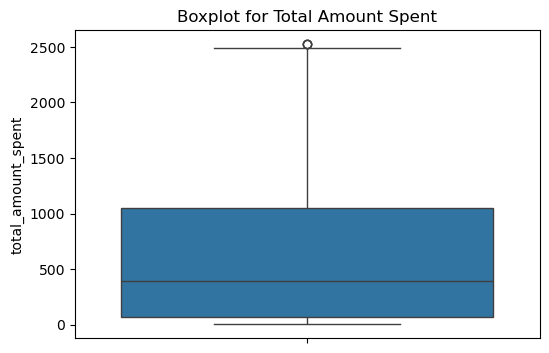

In [25]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df, y= 'total_amount_spent')
plt.title('Boxplot for Total Amount Spent')
plt.show();


The dot on top indicate outlier.

In [27]:
q1 = df.total_amount_spent.quantile(0.25)
q3 = df.total_amount_spent.quantile(0.75)
iqr = q3 -q1
lowerbound = q1 - 1.5 *iqr
upperbound = q1 + 1.5 *iqr
#checking the outlier
(df['total_amount_spent'] < lowerbound) | (df['total_amount_spent'] > upperbound)
outlier = df[(df['total_amount_spent'] < lowerbound) | (df['total_amount_spent'] > upperbound)]
outlier.head()
#Filtering the dataframe to handle the outliers
df = df[(df['total_amount_spent'] >= lowerbound) & (df['total_amount_spent'] <= upperbound)]


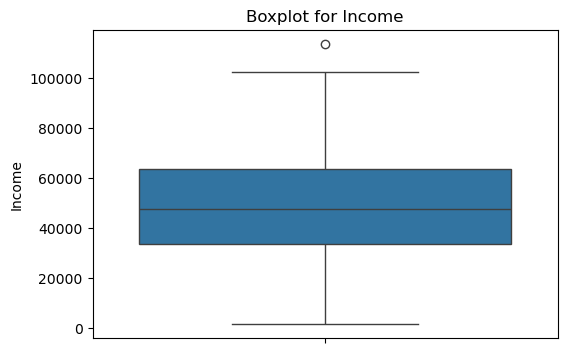

In [29]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df, y = 'income')
plt.title('Boxplot for Income')
plt.ylabel("Income")
plt.show();

No outlier has been detected


<Figure size 1000x600 with 0 Axes>

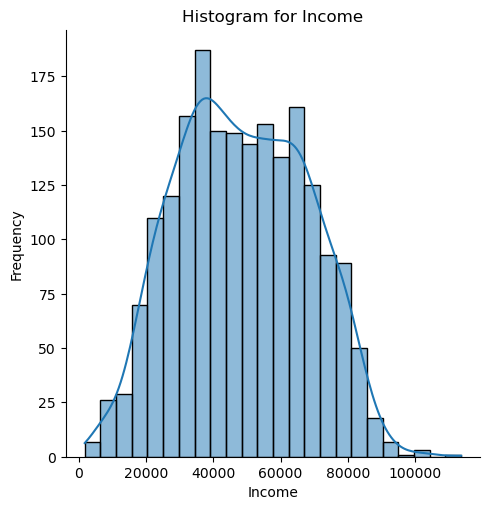

In [35]:
plt.figure(figsize = (10,6))
sns.displot(data = df, x = 'income', kde = True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency');


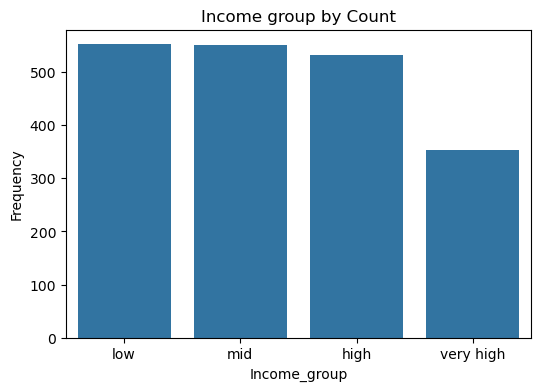

In [37]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x ='income_group')
plt.title('Income group by Count')
plt.xlabel('Income_group')
plt.ylabel('Frequency');

There are more distribution of customers among lowwer and mid income earner


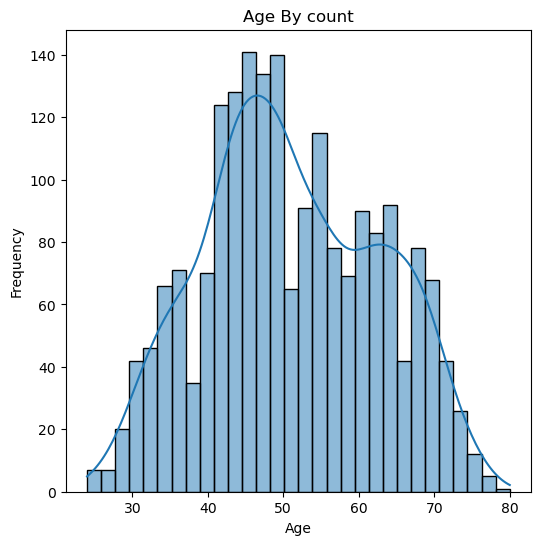

In [39]:
plt.figure(figsize = (6,6))
sns.histplot(data=df, x = 'age', bins =30, kde = True)
plt.title('Age By count')
plt.xlabel('Age')
plt.ylabel('Frequency');

We have more customer between the age 40-50 years

In [41]:
age_group_count = df.age_group.value_counts()
print(age_group_count)
x = df.age_group.value_counts().index
y = df.age_group.value_counts().values

age_group
Senior               957
Adult                667
Middle_Aged Adult    316
Young Adult           48
Name: count, dtype: int64


<Axes: xlabel='age_group', ylabel='count'>

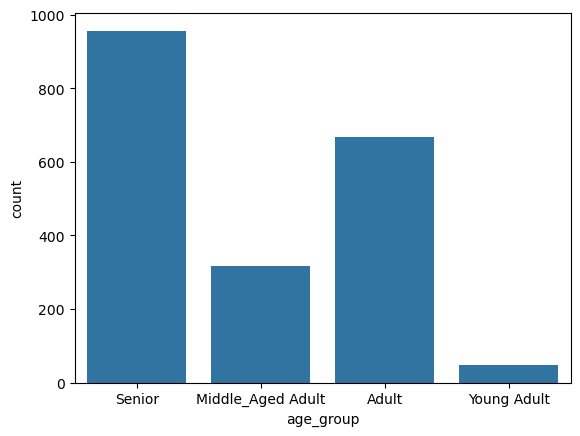

In [35]:

sns.countplot(data = df, x = 'age_group')

We have more cutomers in the age distrubtion of 51+ (senior).

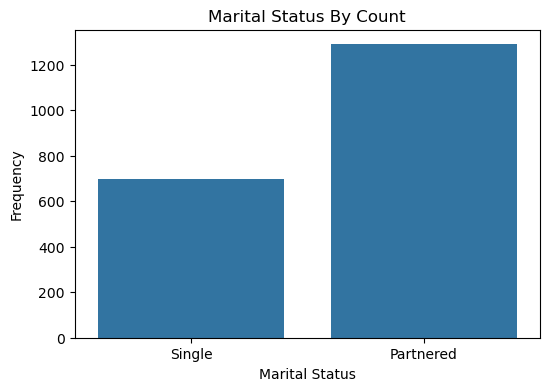

In [43]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'marital_status')
plt.title('Marital Status By Count')
plt.xlabel('Marital Status')
plt.ylabel('Frequency');
       

We have more distribution of customers who are in relationship

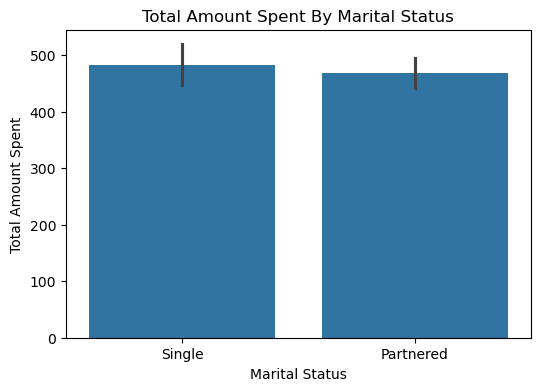

In [45]:
plt.figure(figsize = (6,4))
sns.barplot(data =df, x = 'marital_status', y = 'total_amount_spent')
plt.title('Total Amount Spent By Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount Spent')
plt.show()           

We made more revenue from customers who are in relationship.

## Descriptive statistics

- Average Income
- Average Total spending
- Average engagement score

In [36]:
df[['income', "total_amount_spent", 'engagement_score']].mean()

income                48613.399899
total_amount_spent      473.126258
engagement_score         16.449698
dtype: float64

The average income of customers is 48613.40 and this tells the overall financial capacity of customers,

The average amount spent is 473.13.

## K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

In this section:

+ We will prepare data using One-Hot Encode
+ Normalize numeric features
+ Check for multicollinearity
+ Find the best number of clusters (Elbow method)
+ Run K-means and assign clusters
+ Silhouette score analysis

### One-Hot Encode Categorical Variables 
For categorical variables like education, marital status, and relationship status, one-hot encoding is the best approach.
New feature:

+ k_marital_status
There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'k_marital'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.
+ k_marital_status
There are 3 features that reflect if a person is a graduate or advanced (PhD, masters, graduate) and 2 features if a person still an undergrdaute (education_2n cycle, basic). We will add an additional feature 'k_education'. This feature will equal 1 if a customer's education status is 'graduate or advanced'  and 0 in all other cases.

In [49]:
import numpy as np

conditions4 = [
    (df['marital_status'] == 'Partnered'),
    (df['marital_status'] == 'Single')
]
choices4 = [1, 0]  # Use integers instead of strings

df.loc[:, 'k_marital'] = np.select(conditions4, choices4, default=np.nan)

#.loc[:, 'k_marital'] explicitly tells pandas that we are modifying a column in the original DataFrame, avoiding the warning.


In [51]:
df = df.copy()  # Ensures df is an independent copy


conditions5 = [
    (df['education'].isin(['PhD', 'Masters'])),  # Postgraduate
    (df['education'].isin(['Graduate', 'Undergraduate', 'Basic']))  # Others
]

choices5 = [1, 0]  # 1 = Postgraduate and graduate, 0 = Others

df['k_education'] = np.select(conditions5, choices5)


### Normalize/Scale Numeric Features

K-Means is sensitive to scale, so it’s essential to normalize the numerical features like Income,  Total Amount Spent, marit_status Score.

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define the features to scale
features_for_clustering = ['income', 'total_amount_spent', 'k_marital', 'engagement_score']

# Create a copy of the DataFrame
df_scaled = df.copy()

# Apply StandardScaler
df_scaled[features_for_clustering] = scaler.fit_transform(df_scaled[features_for_clustering])

# Check statistics
df_scaled[features_for_clustering].describe()


,income,total_amount_spent,k_marital,engagement_score
count,1.988000e+03,1.988000e+03,1.988000e+03,1.988000e+03
mean,1.107989e-16,-2.501911e-17,5.718654e-17,2.662748e-16
std,1.000252e+00,1.000252e+00,1.000252e+00,1.000252e+00
min,-2.429974e+00,-1.011921e+00,-1.357963e+00,-1.947101e+00
25%,-7.705927e-01,-8.865456e-01,-1.357963e+00,-7.889479e-01
50%,-3.684606e-02,-4.099038e-01,7.363972e-01,-2.098715e-01
75%,7.892489e-01,8.535751e-01,7.363972e-01,6.587431e-01
max,3.375211e+00,2.297551e+00,7.363972e-01,3.843663e+00


### Prepare Final Dataset for Multicollinearity

In [55]:

# Now, select only the numeric columns for clustering:
                            
features_for_collinerarity= ['k_education', 'k_marital','income', 'age', 'total_amount_spent',  'engagement_score']

df_coll = df[features_for_collinerarity]

### Check for Multicollinearity (Optional)

Some features may be highly correlated, which could affect clustering results. You can check correlation with:

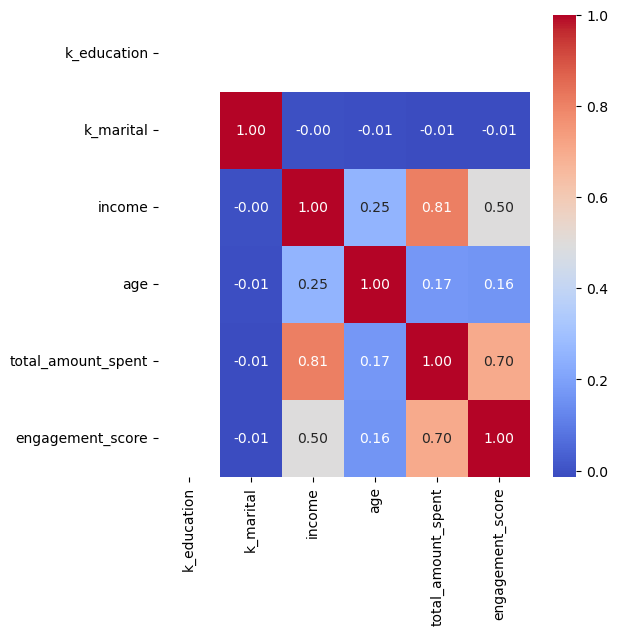

In [57]:
plt.figure(figsize=(6, 6))
sns.heatmap(df_coll.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Key Observations:

+ Income & Total Amount Spent (0.72): Strong positive correlation → Higher income is linked to higher spending.

+ Engagement Score & Total Amount Spent (0.64): Moderate positive correlation → More engaged users tend to spend more.

+ Income & Engagement Score (0.50): Moderate positive correlation → Higher-income users tend to have higher engagement.

+ Age & Income (0.21): Weak positive correlation → Older individuals may earn more, but not strongly.

+ K_Education & Other Variables (~0.00 to -0.02): Almost no correlation → Education level doesn’t significantly impact spending, engagement, or income in this dataset.

+ K_Marital & Other Variables (~0.00 to -0.02): Also shows little to no correlation with spending, engagement, or income.

### Principal Component Analysis (PCA)¶
PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.Determine the Optimal Number of Clusters (K)
Before applying K-Means, determine the best number of clusters (k). The Elbow Method is a common approach:




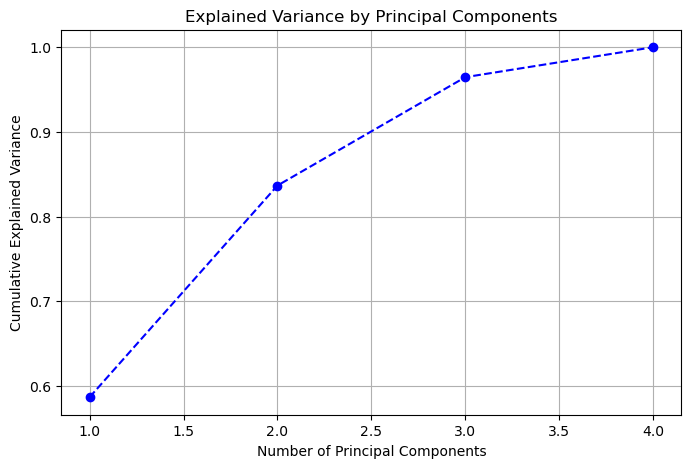

PC1: 0.5867 variance explained
PC2: 0.2500 variance explained
PC3: 0.1280 variance explained
PC4: 0.0354 variance explained

Optimal number of components: 3


<bound method NDFrame.head of            PC1       PC2       PC3
0    -1.149608 -1.362095 -0.570666
1     1.121990  0.762124 -0.728490
2    -1.724432  0.712443  0.076115
3     0.561030  0.743658  0.233316
4     1.158896  0.750518  0.141471
...        ...       ...       ...
1983  1.961321  0.755662  0.029522
1984  1.147237  0.747695  0.614436
1985  1.185476 -1.340881 -0.636371
1986  1.451689  0.758927 -0.215998
1987 -0.400475  0.737952 -0.214966

[1988 rows x 3 columns]>

In [59]:
from sklearn.decomposition import PCA


# Initialize PCA (we'll start with all components)
pca = PCA(n_components=len(features_for_clustering))

# Fit and transform the standardized data
principal_components = pca.fit_transform(df_scaled[features_for_clustering])

# Create a DataFrame for principal components
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(len(features_for_clustering))])

# Explained variance ratio (to determine how much information each PC retains)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features_for_clustering) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Print explained variance for each component
for i, var in enumerate(explained_variance):
    print(f'PC{i+1}: {var:.4f} variance explained')

# Choose the number of components that explain most of the variance (e.g., 95%)
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nOptimal number of components: {optimal_components}")

# Apply PCA again with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
df_pca_optimal = pca_optimal.fit_transform(df_scaled[features_for_clustering])

# Convert to DataFrame
df_pca_optimal = pd.DataFrame(df_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])

df_pca_optimal.head





#### Silhouette score analysis
Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined

Silhouette Score for 2 clusters: 0.4289
Silhouette Score for 3 clusters: 0.4442
Silhouette Score for 4 clusters: 0.4740
Silhouette Score for 5 clusters: 0.4547
Silhouette Score for 6 clusters: 0.4331
Silhouette Score for 7 clusters: 0.4266
Silhouette Score for 8 clusters: 0.3812
Silhouette Score for 9 clusters: 0.3719


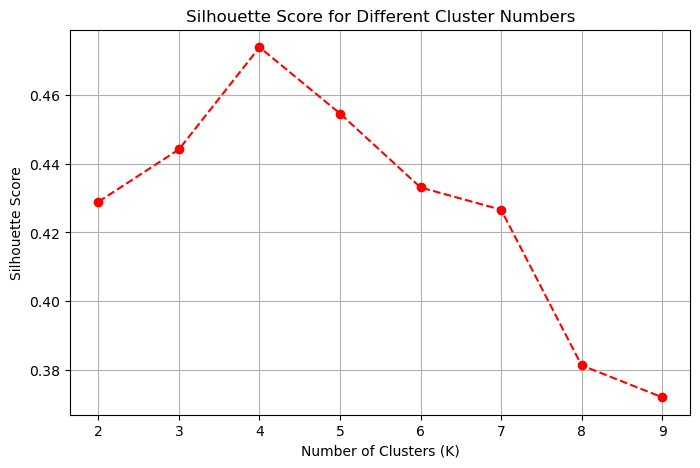


Best number of clusters based on silhouette score: 4


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of clusters to evaluate
cluster_range = range(2, 10)
silhouette_scores = []

# Loop through different cluster values
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca_optimal)  # Using PCA-transformed data
    score = silhouette_score(df_pca_optimal, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Plot Silhouette Score vs Number of Clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.grid()
plt.show()

# Identify the best K (highest silhouette score)
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nBest number of clusters based on silhouette score: {best_k}")



Key Observations:
+ Best number of clusters: 4 (highest Silhouette Score: 0.4740)
+ Impact of adding engagement score:

The best cluster count increased from 4 (0.5518) to 4 (0.4740) (a slight drop in silhouette score, but still optimal).
This suggests that engagement score adds some complexity but still aligns well with our segmentation.
The clusters might have better-defined engagement-driven segments now.

# Exploration of Clusters¶
In this section:

+ Visualisation of clusters
+ Mean consumption of different product types by cluster
+ Cluster sizes
+ Income by cluster
+ In_relationship feature by cluster

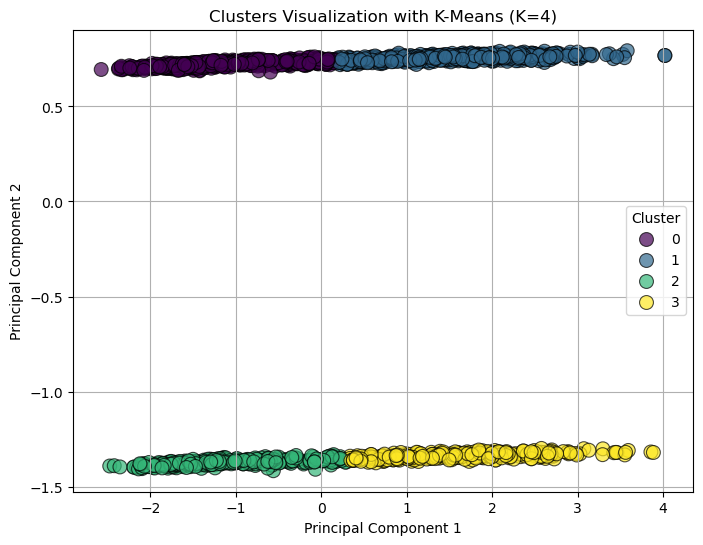

In [63]:
from sklearn.cluster import KMeans

# Apply K-Means with the optimal K=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca_optimal['Cluster'] = kmeans.fit_predict(df_pca_optimal)

# Visualizing the clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_pca_optimal.iloc[:, 0],  # First principal component
    y=df_pca_optimal.iloc[:, 1],  # Second principal component
    hue=df_pca_optimal['Cluster'],
    palette='viridis',
    s=100, alpha=0.7, edgecolors='k'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with K-Means (K=4)')
plt.legend(title='Cluster')
plt.grid()
plt.show()


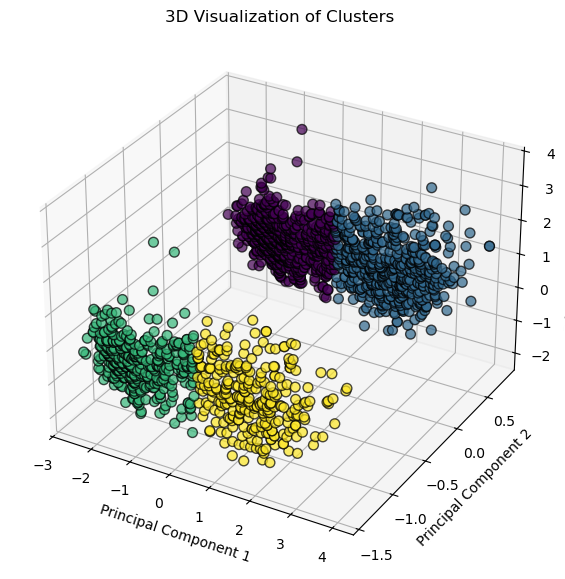

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_pca_optimal.iloc[:, 0], df_pca_optimal.iloc[:, 1], df_pca_optimal.iloc[:, 2],
    c=df_pca_optimal['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolors='k'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Clusters')
plt.show()


In [67]:


explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.58668502 0.83666482 0.96463837 1.        ]


cluster visualization shows four distinct groups based on Principal Component 1 (PC1) and Principal Component 2 (PC2). However, the separation appears somewhat linear, possibly indicating a strong influence of one dominant feature.

Observations:
Two distinct bands of clusters are visible:
The upper band (clusters 0 and 2).
The lower band (clusters 1 and 3).
The clustering seems to be heavily influenced by one principal component (PC1), while PC2 has a smaller range.
Possible Reasons:
PCA may have retained one dominant feature causing the linear pattern.
There might be underlying categorical variables influencing the separation.

In [167]:
df

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,education,familysize,marital_status,age_group,income_group,engagement_score,total_amount_spent,acceptance,k_marital,k_education
1,46344.0,1,1,38,11,1,6,2,1,6,...,Graduates,2,Single,Senior,mid,10,27,0,0.0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,Graduates,0,Partnered,Senior,very high,17,776,0,1.0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,Graduates,1,Partnered,Middle_Aged Adult,low,10,53,0,1.0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,Postgraduates,1,Partnered,Middle_Aged Adult,high,21,422,0,1.0,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,Postgraduates,1,Partnered,Senior,high,22,716,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,Graduates,1,Partnered,Senior,high,22,1341,0,1.0,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,Postgraduates,3,Partnered,Senior,high,26,444,1,1.0,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,Graduates,0,Single,Middle_Aged Adult,high,15,1241,1,0.0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,Postgraduates,1,Partnered,Senior,very high,21,843,0,1.0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 1 to 2204
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   income                1988 non-null   float64 
 1   kidhome               1988 non-null   int64   
 2   teenhome              1988 non-null   int64   
 3   recency               1988 non-null   int64   
 4   mntwines              1988 non-null   int64   
 5   mntfruits             1988 non-null   int64   
 6   mntmeatproducts       1988 non-null   int64   
 7   mntfishproducts       1988 non-null   int64   
 8   mntsweetproducts      1988 non-null   int64   
 9   mntgoldprods          1988 non-null   int64   
 10  numdealspurchases     1988 non-null   int64   
 11  numwebpurchases       1988 non-null   int64   
 12  numcatalogpurchases   1988 non-null   int64   
 13  numstorepurchases     1988 non-null   int64   
 14  numwebvisitsmonth     1988 non-null   int64   
 15  acceptedc


### Question 1
What are the main customer segments based on purchasing behavior?

Get Cluster Descriptions Using Pandas & GroupBy
We can calculate the mean values for each cluster:

In [69]:
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster')[['income', 'total_amount_spent', 'engagement_score']].mean()
print(cluster_summary)


               income  total_amount_spent  engagement_score
Cluster                                                    
0        36019.218206          128.392236         12.160643
1        65884.826568          937.097786         22.204797
2        35909.321867          133.009828         12.540541
3        66480.866438          967.890411         22.188356


This will give an idea of which clusters have high spenders, low spenders, highly engaged customers, etc.

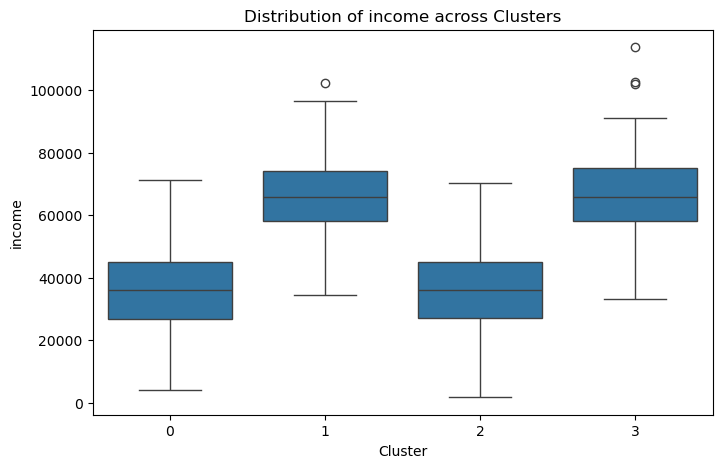

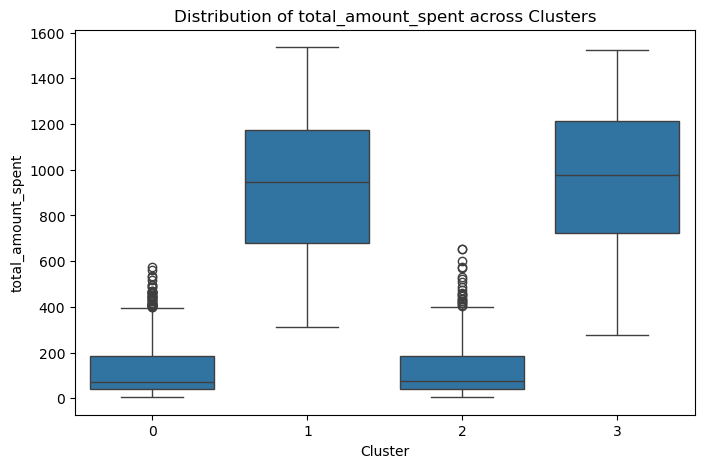

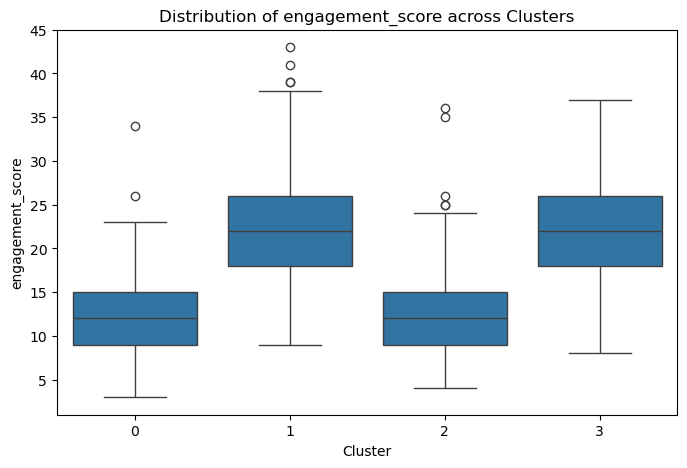

In [71]:
features = ['income', 'total_amount_spent', 'engagement_score']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()


Helps in checking which cluster is dominant and if segmentation is balanced.

Interpretation of Clusters
Cluster 0

Moderate to high income range.
Low spending behavior.
Moderate engagement score.
Possible Segment: "High earners but cautious spenders."

Cluster 1

High-income group.
Highest total amount spent.
High engagement score.
Possible Segment: "High-income, high-spending, highly engaged customers."

Cluster 2

Low-income group.
Low spending behavior.
Lowest engagement score.
Possible Segment: "Low-income, low-spending, least engaged customers."

Cluster 3

High-income group.
High total amount spent (similar to Cluster 1).
High engagement score.
Possible Segment: "Loyal and high-spending customers.

In [73]:
df['Cluster'].value_counts()


Cluster
0    747
1    542
2    407
3    292
Name: count, dtype: int64

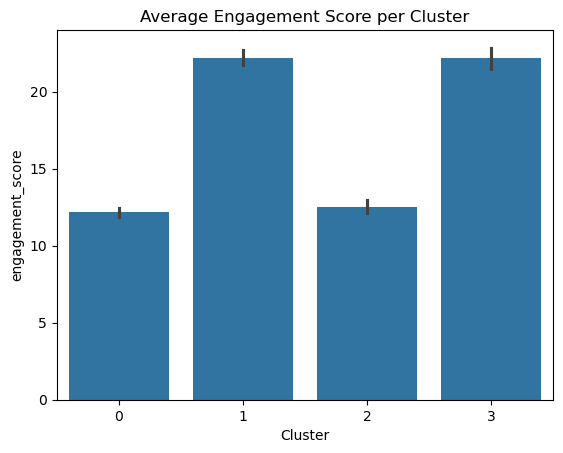

In [67]:
sns.barplot(x='Cluster', y='engagement_score', data=df)
plt.title('Average Engagement Score per Cluster')
plt.show()


Insights from the Chart

Cluster 1 & Cluster 3

Have the highest engagement scores.
These are the most engaged customer groups—they interact with your brand frequently.

Cluster 0 & Cluster 2

Have lower engagement scores, with Cluster 2 being the least engaged.
These customers might require targeted marketing efforts to increase engagement.

In [75]:
# Ensure 'Cluster' is treated as a column
if 'Cluster' not in df.columns:
    print("⚠️ 'Cluster' column is missing! Check your DataFrame.")

# Group by cluster labels and compute mean for key features
cluster_summary = df.groupby('Cluster')[['income', 'total_amount_spent', 'engagement_score']].mean()
print(cluster_summary)


               income  total_amount_spent  engagement_score
Cluster                                                    
0        36019.218206          128.392236         12.160643
1        65884.826568          937.097786         22.204797
2        35909.321867          133.009828         12.540541
3        66480.866438          967.890411         22.188356


Key Observations

Clusters 1 & 3: High-Income, High-Spending, Highly Engaged

Customers in these groups earn the most ($66K)  and spend significantly more ($937–$968).
They also have the highest engagement scores (22).
💡 Interpretation: These could be your premium customers or loyal shoppers who engage frequently and contribute the most revenue.

Clusters 0 & 2: Low-Income, Low-Spending, Low Engagement

Customers here earn significantly less ($36K) and spend much less ($128–$133).
Their engagement scores (2) are also lower.

💡 Interpretation: These might be budget-conscious shoppers or less frequent buyers who need re-engagement.



In [77]:
#A quick analysis to see clusters vs income_group
print(df.groupby('Cluster')['income_group'].value_counts())

Cluster  income_group
0        low             360
         mid             294
         high             89
         very high         4
1        high            270
         very high       221
         mid              50
         low               1
2        low             190
         mid             173
         high             42
         very high         2
3        high            131
         very high       127
         mid              33
         low               1
Name: count, dtype: int64


Clusters 1 & 3 remain the most valuable customers because they are dominated by high and very high-income earners. They should be prioritized for premium services, high-ticket offers, and retention programs.

⚠️ Clusters 0 & 2 are lower-value customers but could be upsold or incentivized with budget-friendly promotions to increase engagement.

### Question 2
   Which factors influence customer engagement in marketing campaigns?
+ Correlation Analysis: Does engagement correlate with income or total amount spent?
+ Does Marital Status Influence Engagement?
+ Are High-Value Customers Also Highly Engaged?

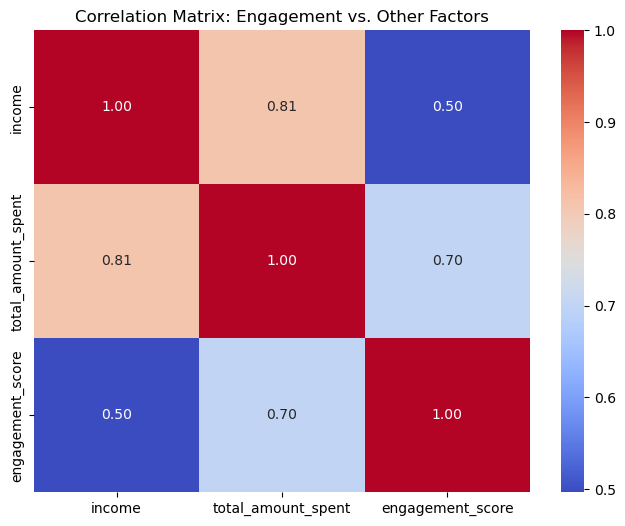

In [79]:
# Compute correlation matrix
correlation_matrix = df[['income', 'total_amount_spent', 'engagement_score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Engagement vs. Other Factors")
plt.show()

Key Observations
+ Income & Total Amount Spent (0.81): very strong correlation. This indicates that, as income increases, the total amount spent tends to increase significantly.
+ Total Amount Spent & Engagement (0.70): suggesting that customers who spend more are also generally more engaged.
+ Income & Engagement Score (0.50):Moderate correlation, implying that while higher income tends to be associated with higher engagement, the relationship is not as strong as with spending.

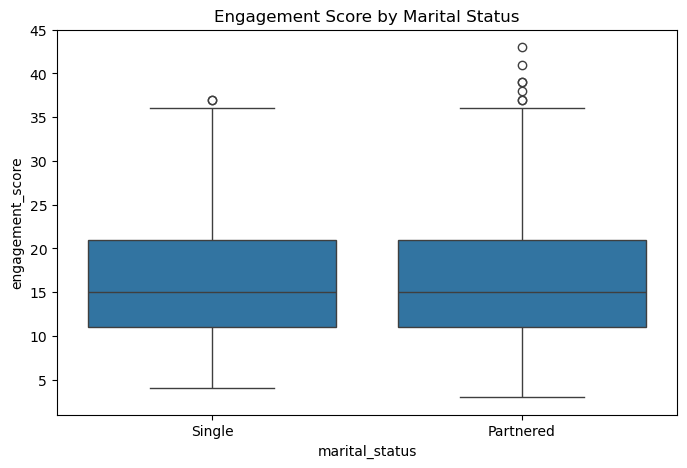

In [75]:
# Boxplot of engagement score by marital status
plt.figure(figsize=(8,5))
sns.boxplot(x='marital_status', y='engagement_score', data=df)
plt.title("Engagement Score by Marital Status")
plt.show()


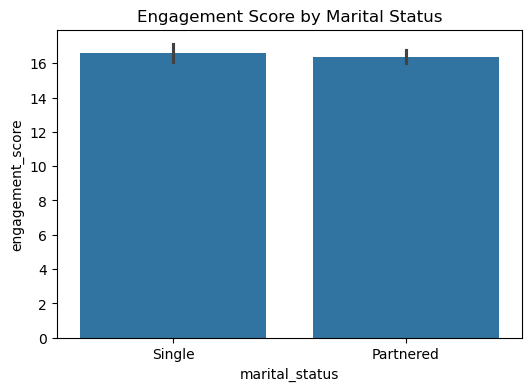

In [176]:
# Boxplot of engagement score by marital status

plt.figure(figsize=(6,4))
sns.barplot(data= df,x='marital_status', y='engagement_score')
plt.title("Engagement Score by Marital Status")
plt.show()


In [263]:
df.groupby('marital_status')['engagement_score'].mean()

marital_status
Partnered    16.384019
Single       16.570815
Name: engagement_score, dtype: float64

Overall Interpretation:
Single people in my dataset are more engaged, which implies that marketing campaigns could be tailored to capitalize on this engagement—for example, by offering promotions or content that resonates specifically with single customers.

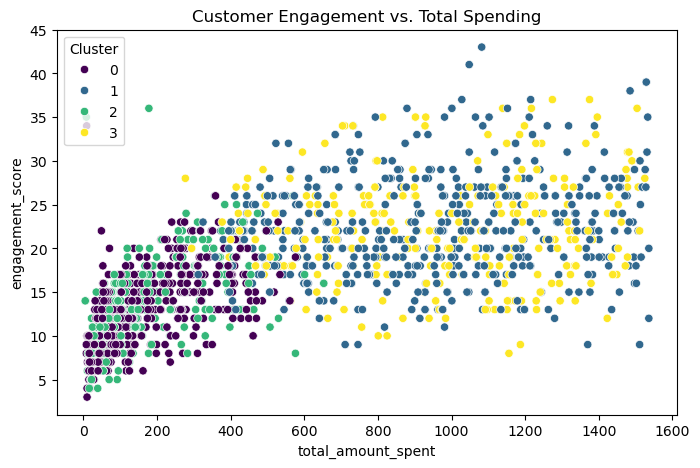

In [267]:
# Scatter plot of total spent vs. engagement score
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_amount_spent', y='engagement_score', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Engagement vs. Total Spending")
plt.show()


Observations:
Positive Correlation:

The overall trend suggests that as total amount spent increases, engagement score also increases. This aligns with your earlier correlation matrix (0.70 correlation between spending and engagement).
Cluster Distribution:

+ Cluster 0 (Purple): Lower spenders with lower engagement.
+ Cluster 1 (Teal): Higher engagement but a mix of spending levels.
+ Cluster 2 (Blue): Mid-to-high spenders with varying engagement levels.
+ Cluster 3 (Yellow): High spenders with the highest engagement, mostly concentrated at the top-right corner.




### Question 3
How do online vs. offline shoppers differ?

In [77]:
df.groupby('Cluster')[['numwebpurchases', 'numstorepurchases']].mean() 

,numwebpurchases,numstorepurchases
Cluster,,
0,2.397590,3.617135
1,6.140221,8.285978
2,2.498771,3.520885
3,5.952055,8.315068


Observations & Insights:

Clusters 1 & 3 have the highest online and offline purchases

+ Cluster 1: Highest number of online (6.14) and offline (8.29) purchases
+ Cluster 3: Slightly lower online (5.95) but highest offline (8.32) purchases
+ These could represent high-value or highly engaged customers who shop frequently through both channels.

Clusters 0 & 2 have significantly lower purchases

+ Cluster 0: Online (2.40), Offline (3.62)
+ Cluster 2: Online (2.50), Offline (3.52)

These might be occasional or low-engagement shoppers.

#### Charts to show online shoppers vs offline shoppers

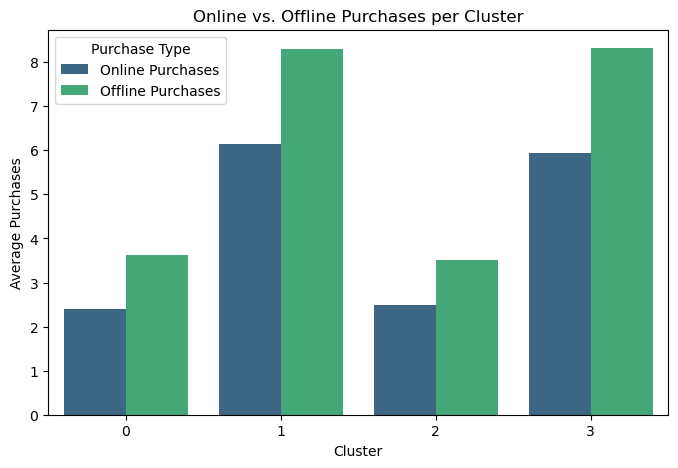

In [87]:

# Data (replace with actual values from your dataset)
cluster_data = {
    'Cluster': ['0', '1', '2', '3'],
    'Online Purchases': [2.40, 6.14, 2.50, 5.95],
    'Offline Purchases': [3.62, 8.29, 3.52, 8.32]
}

# Convert to DataFrame
df_cluster = pd.DataFrame(cluster_data)

# Melt the DataFrame for easier plotting
df_melted = df_cluster.melt(id_vars='Cluster', var_name='Purchase Type', value_name='Count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Count', hue='Purchase Type', data=df_melted, palette='viridis')

# Titles and labels
plt.title('Online vs. Offline Purchases per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchases')
plt.legend(title='Purchase Type')

# Show plot
plt.show()


### Question 4

What are the characteristics of high-value customers?

Demographic Breakdown by Percentage
Objective:
Determine the composition of education levels (postgraduate, graduate, undergraduate, etc.) and marketing campaign results within Clusters 1 and 3.

In [148]:
# For education distribution in each cluster (assuming "Education" column exists)
education_distribution = df[df['Cluster'].isin([1,3])].groupby('Cluster')['education'] \
                           .value_counts(normalize=True) * 100
print(education_distribution)

# Alternatively, using a crosstab for clarity:
edu_ct = pd.crosstab(df['Cluster'], df['education'], normalize='index') * 100
edu_ct = edu_ct.loc[[1,3]]  # Focus on clusters 1 & 3
print(edu_ct)


Cluster  education     
1        Graduates         51.107011
         Postgraduates     39.852399
         Undergraduates     9.040590
3        Graduates         54.109589
         Postgraduates     38.013699
         Undergraduates     7.876712
Name: proportion, dtype: float64
education  Graduates  Postgraduates  Undergraduates
Cluster                                            
1          51.107011      39.852399        9.040590
3          54.109589      38.013699        7.876712


Key Observations

Cluster 1 and Cluster 3 are your high-value customers (big spenders).
+ Graduates dominate both clusters (51-54%).
+ Postgraduates also have a strong presence (38-40%).
+ Undergraduates are the minority (7-9%).

Since I don’t have AcceptedCmpOverall, I have to create it by checking if a customer accepted at least one campaign. You can do this by summing across the five campaign columns (acceptedcmp1 to acceptedcmp5). If the sum is greater than 0, the customer has accepted at least one campaign.

In [181]:
df['acceptedCmpOverall'] = df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']].sum(axis=1) > 0
df['acceptedCmpOverall'] = df['AcceptedCmpOverall'].astype(int)  # Convert to 1 or 0


In [203]:
#Now that we have AcceptedCmpOverall, we can calculate the percentage of customers in Clusters 1 and 3 who responded to at least one campaign.
campaign_response = df[df['Cluster'].isin([1,3])].groupby('Cluster')['AcceptedCmpOverall'].mean() * 100
print(campaign_response)


Cluster
1    26.568266
3    27.397260
Name: AcceptedCmpOverall, dtype: float64


In [210]:
campaign_acceptance = df[df['Cluster'].isin([1,3])].groupby('Cluster')[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']].mean() * 100
print(campaign_acceptance)

         acceptedcmp1  acceptedcmp2  acceptedcmp3  acceptedcmp4  acceptedcmp5
Cluster                                                                      
1            9.040590      1.845018      7.380074     10.885609      7.380074
3            7.876712      2.054795      6.849315     14.041096      8.219178


## Further Analysis

+ Camapaign 4 and campaign 2 by Age group
+ High Value Customers (cluster 1 and 3) By Age group

In [113]:
df.groupby('age_group')[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']].mean()*100 

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
age_group,,,,,
Adult,2.248876,0.749625,7.346327,4.947526,2.248876
Middle_Aged Adult,4.113924,0.316456,10.126582,3.164557,5.379747
Senior,4.493208,1.044932,5.433647,7.836991,2.716823
Young Adult,8.333333,4.166667,10.416667,4.166667,12.500000


In [126]:
#High value customers by age group
df[df['Cluster'].isin([1,3])].groupby('Cluster')['age_group'].value_counts()

Cluster  age_group        
1        Senior               310
         Adult                163
         Middle_Aged Adult     63
         Young Adult            6
3        Senior               182
         Adult                 73
         Middle_Aged Adult     23
         Young Adult           14
Name: count, dtype: int64

## Insights
### Interpretation of Clusters

Cluster 0

Moderate to high income range.
Low spending behavior.
Moderate engagement score.
Possible Segment: "High earners but cautious spenders."

Cluster 1

High-income group.
Highest total amount spent.
High engagement score.
Possible Segment: "High-income, high-spending, highly engaged customers."

Cluster 2

Low-income group.
Low spending behavior.
Lowest engagement score.
Possible Segment: "Low-income, low-spending, least engaged customers."

Cluster 3

High-income group.
High total amount spent (similar to Cluster 1).
High engagement score.
Possible Segment: "Loyal and high-spending customers.

### Average income,  Average Amount_spent, and Average Engagement score VS Clusters

Clusters 1 & 3: High-Income, High-Spending, Highly Engaged

Customers in these groups earn the most (66K)  and spend significantly more ($937–$968).
They also have the highest engagement scores (22).

Interpretation: These could be premium customers or loyal shoppers who engage frequently and contribute the most revenue.

Clusters 0 & 2: Low-Income, Low-Spending, Low Engagement

Customers here earn significantly less (36K) and spend much less ($128–$133).
Their engagement scores (2) are also lower.

Interpretation: These might be budget-conscious shoppers or less frequent buyers who need re-engagement.


### Engagement vs. Other Factors
+ Income & Total Amount Spent (0.81): very strong correlation. This indicates that, as income increases, the total amount spent tends to increase significantly.
+ Total Amount Spent & Engagement (0.70): suggesting that customers who spend more are also generally more engaged.
+ Income & Engagement Score (0.50):Moderate correlation, implying that while higher income tends to be associated with higher engagement, the relationship is not as strong as with spending.

### Engagement Score by Marital 

Single people are more engaged.

### Customer Engagement vs. Total Spending

Cluster 1 and 3 are our high value customers.

High-Value Customers Are Highly Engaged:

The yellow dots (Cluster 3) represent high-spending, highly engaged customers. These customers are likely prime targets for premium campaigns, loyalty programs, or exclusive deals.

Lower Spend, Lower Engagement (Cluster 0): Customers in this cluster are spending less and are also less engaged. They might need more incentives to boost engagement (e.g., personalized offers, targeted ads).

### Offline shoppers vs Online shoppers

+ Clusters 1 & 3 have the highest online and offline purchases
+ Clusters 0 & 2 have significantly lower purchases

###  High-value customers By Education Qualification  

Education level correlates with spending behavior.

Graduates and postgraduates make up ~90% of the high-value customer base.
Undergraduates are a very small segment of these high spenders.
Cluster 3 has a slightly higher proportion of graduates (54%) vs. Cluster 1 (51%).

This could suggest that Cluster 3 leans more towards graduates, whereas Cluster 1 has a slightly higher postgraduate representation.

### High Value Customers  By Marketing campaign responses

+ Cluster 3 is slightly more responsive to campaigns than Cluster 1.Particularly in Campaign 4 (14%), suggesting the campaign's content, timing, or product offering was more appealing.

+ Campaign 2 was ineffective across both clusters. It had the lowest engagement, suggesting it may need redesigning (wrong product, poor targeting, or bad timing).

+ Cluster 1 & 3 are generally receptive to marketing efforts (~26-27% acceptance overall). This makes them a prime target for future campaigns.

### Marketing campaign result vs Age group

+ Young Adults & Middle-Aged Adults are the most engaged in marketing campaigns.
+ Seniors engage selectively, especially with Campaign 4.
+ Adults have the lowest response rate across all campaigns.
+ Campaign 3 seems effective across most groups but especially in Young Adults and Middle-Aged Adults.
+ Campaign 5 was very effective for Young Adults, suggesting a trend that could be leveraged.
+ Campaign 2 is the least effective among rest with effective, seems to be a bit effective on the youth.

### High Value Customers by Age Group

+ Cluster 3 shows a strong presence of Seniors and Adults, which suggests that older customers are more engaged and contribute significantly to spending. As you mentioned, this could be due to the fact that they may have more disposable income (possibly due to retirement or established careers) and more time to engage with your brand.

+ Cluster 1 also mirrors this trend, but with slightly fewer Seniors and Adults. These customers are still highly engaged and tend to spend a lot, indicating they may have substantial financial resources and a willingness to engage with high-end products or services.
Young Adults (20-30) in both clusters appear to be the minority, as expected. They are likely still in the earlier stages of their careers, which limits their disposable income and spending potential. Their lower engagement levels also suggest they might be less likely to interact with the brand consistently, or might not prioritize spending on premium products yet.


### Marketing Strategy Recommendations:
#### High Value Customer
For Clusters 1 & 3 (High-value Customers), offer exclusive deals, early access to products, and VIP loyalty programs to retain them.
Consider personalized marketing to increase their spending.

For Clusters 0 & 2 (Low-spending, Low-engagement Customers), Implement discount-based incentives to encourage spending. Try email marketing campaigns, loyalty rewards, or free shipping offers to boost engagement.

Clusters 1 & 3 have the highest online and offline purchases which shows they are yet again ou High-Value customers. Adjust the marketing strategies for customers within cluster 0 & 2, email marketing campaign and discount could be a better approach.

#### Marital Status
Since single people in my dataset are more engaged, which implies that marketing campaigns could be tailored to capitalize on this engagement—for example, by offering promotions or content that resonates specifically with single customers.

#### Education Qualification
Target Graduates & Postgraduates in marketing strategies. Since these groups are more likely to be high spenders, focus marketing campaigns on them. Use promotions tailored to professionals, premium product offerings, or loyalty programs for alumni networks.


#### Age Group
+ For Young Adults:

Focus on Campaign 5 & 3 (which had the highest acceptance).

Use social media marketing, influencer promotions, and mobile-friendly campaigns.

Consider gamified offers, discount codes, and exclusive online deals.
Focus on Career Building for Young Adults.
While young adults are less engaged and spend less, you could introduce entry-level products or services targeting this group. Marketing could focus on affordable, value-for-money products or discounts to build brand loyalty early on. Also, introducing career-related content, incentives, or benefits might catch their attention as they start earning.


+ For Middle-Aged Adults:

Keep investing in Campaign 3 & 5, but also refine Campaign 4.

Use email marketing, referral programs, and loyalty points.


Provide premium offers or professional-targeted incentives.

+ For Seniors:

Campaign 4 worked best—focus on personalized promotions, phone support, and trust-based marketing.

Use direct emails, loyalty rewards, and in-store promotions.

+ For Adults:

Since response rates are low, test new campaign approaches (e.g., bundled offers, subscription models, or exclusive benefits).
Target them with retargeting ads and personalized content

Increase Marketing Targeting for Older Age Groups.
Given that Seniors and Adults in Cluster 1 & 3 are the primary contributors to high spending and engagement, you can target these groups with exclusive promotions or luxury product discounts. Offering tailored experiences for older customers, such as loyalty rewards, or time-sensitive offers during their leisure hours, might further boost engagement.
